In [1]:
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
from torch.optim import Optimizer
from torch import nn

from train import *
from model import LogisticRegression

Epoch 0/10


100%|██████████| 40/40 [00:01<00:00, 35.11it/s, loss=1.7624594, acc={tensor(0.8190)}]


Epoch 1/10


100%|██████████| 40/40 [00:01<00:00, 34.72it/s, loss=1.6970437, acc={tensor(0.8477)}]


Epoch 2/10


100%|██████████| 40/40 [00:01<00:00, 36.74it/s, loss=1.6699361, acc={tensor(0.8591)}]


Epoch 3/10


100%|██████████| 40/40 [00:01<00:00, 34.77it/s, loss=1.65429, acc={tensor(0.8647)}]  


Epoch 4/10


100%|██████████| 40/40 [00:01<00:00, 36.90it/s, loss=1.6435815, acc={tensor(0.8697)}]


Epoch 5/10


100%|██████████| 40/40 [00:01<00:00, 34.70it/s, loss=1.635464, acc={tensor(0.8735)}] 


Epoch 6/10


100%|██████████| 40/40 [00:01<00:00, 34.68it/s, loss=1.6289219, acc={tensor(0.8762)}]


Epoch 7/10


100%|██████████| 40/40 [00:01<00:00, 36.32it/s, loss=1.6234541, acc={tensor(0.8787)}]


Epoch 8/10


100%|██████████| 40/40 [00:01<00:00, 39.03it/s, loss=1.6187816, acc={tensor(0.8823)}]


Epoch 9/10


100%|██████████| 40/40 [00:01<00:00, 36.59it/s, loss=1.6147265, acc={tensor(0.8832)}]


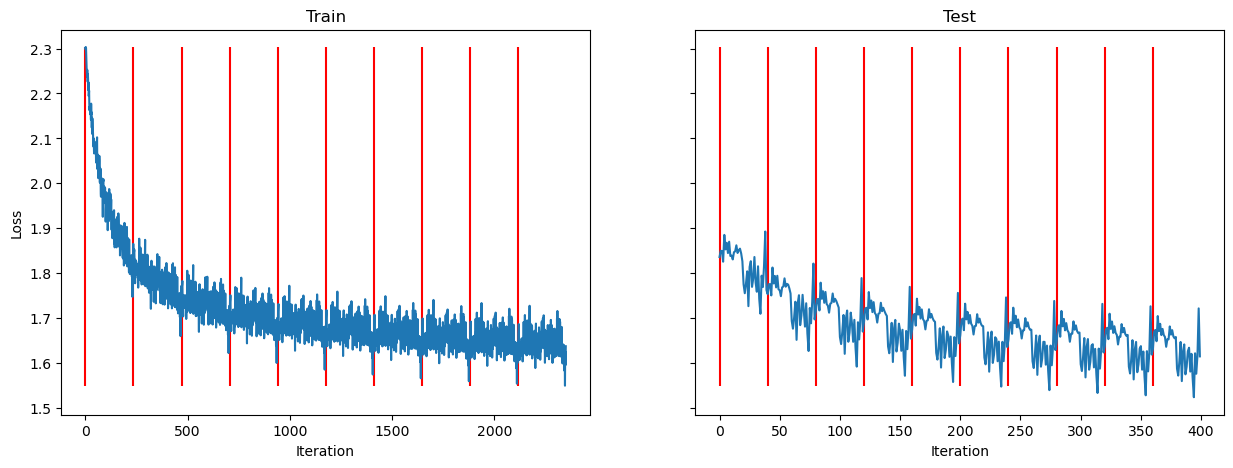

In [2]:
toTensor = transforms.Compose(
    [
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

train_dataset = datasets.MNIST(
    root="./data", train=True, transform=toTensor, download=True
)

test_dataset = datasets.MNIST(
    root="./data", train=False, transform=toTensor, download=True
)

BATCH_SIZE = 256
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

model = LogisticRegression(28 * 28, 10)
# sgd = ProxFinito(model.parameters(), lr=0.01, n_batches=len(train_loader), theta=)
sgd = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()
N_EPOCHS = 10

train_loss_data = []
test_loss_data = []
fig, axs = plt.subplots(ncols=2, figsize=(15, 5), sharey=True)

for epoch in range(N_EPOCHS):
    print(f"Epoch {epoch}/{N_EPOCHS}")
    train_loss_data += train_model(train_loader, model, loss_fn, sgd)
    c_test_loss_data, acc = test_model(test_loader, model, loss_fn)
    test_loss_data += c_test_loss_data

for epoch in range(N_EPOCHS):
    axs[0].vlines(epoch * len(train_loader), min(train_loss_data), max(train_loss_data), colors='r')
    axs[1].vlines(epoch * len(test_loader), min(train_loss_data), max(train_loss_data), colors='r')

axs[0].set_xlabel("Iteration")
axs[1].set_xlabel("Iteration")
axs[0].set_ylabel("Loss")
axs[0].set_title("Train")
axs[1].set_title("Test")
axs[0].plot(train_loss_data)
axs[1].plot(test_loss_data)